In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from category_encoders import TargetEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import joblib


In [234]:
df = pd.read_csv('../data/athlete_events.csv')
region_df = pd.read_csv('../data/noc_regions.csv')

In [235]:
region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [236]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [237]:
df.shape

(271116, 15)

In [238]:
df = df.merge(region_df, on='NOC', how = 'left')

In [239]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [241]:
df.duplicated().sum()

np.int64(1385)

In [242]:
df.drop_duplicates(inplace=True)

In [243]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
region       370
notes     264696
dtype: int64

In [244]:
df['Event'].unique().size

765

In [245]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [246]:
df.drop(columns=['ID', 'Name', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Event', 'notes'], inplace=True)

In [247]:
df

,Sex,Age,Height,Weight,Sport,Medal,region
0,M,24.0,180.0,80.0,Basketball,NaN,China
1,M,23.0,170.0,60.0,Judo,NaN,China
2,M,24.0,NaN,NaN,Football,NaN,Denmark
3,M,34.0,NaN,NaN,Tug-Of-War,Gold,Denmark
4,F,21.0,185.0,82.0,Speed Skating,NaN,Netherlands
...,...,...,...,...,...,...,...
271111,M,29.0,179.0,89.0,Luge,NaN,Poland
271112,M,27.0,176.0,59.0,Ski Jumping,NaN,Poland
271113,M,27.0,176.0,59.0,Ski Jumping,NaN,Poland
271114,M,30.0,185.0,96.0,Bobsleigh,NaN,Poland


In [307]:
df['Medal'].unique()

array([2, 1, 0, 3])

In [249]:
df['Medal'].fillna("No Medal", inplace=True)

C:\Users\Ayushi\AppData\Local\Temp\ipykernel_11424\3973663870.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Medal'].fillna("No Medal", inplace=True)


In [250]:
region_df['region'].unique().shape

(207,)

In [251]:
df.shape

(269731, 7)

In [252]:
df.isnull().sum()

Sex           0
Age        9315
Height    58814
Weight    61527
Sport         0
Medal         0
region      370
dtype: int64

In [253]:
df['Medal'].value_counts()

Medal
No Medal    229959
Gold         13369
Bronze       13295
Silver       13108
Name: count, dtype: int64

In [254]:
df = df.dropna(subset=['region'])

In [255]:
le_medal = LabelEncoder()
df['Medal'] = le_medal.fit_transform((df['Medal']))

C:\Users\Ayushi\AppData\Local\Temp\ipykernel_11424\937654749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Medal'] = le_medal.fit_transform((df['Medal']))


In [256]:
X = df.drop('Medal', axis=1)
y = df['Medal']

In [257]:
print(X.shape)
print(y.shape)

(269361, 6)
(269361,)


In [258]:
X

,Sex,Age,Height,Weight,Sport,region
0,M,24.0,180.0,80.0,Basketball,China
1,M,23.0,170.0,60.0,Judo,China
2,M,24.0,NaN,NaN,Football,Denmark
3,M,34.0,NaN,NaN,Tug-Of-War,Denmark
4,F,21.0,185.0,82.0,Speed Skating,Netherlands
...,...,...,...,...,...,...
271111,M,29.0,179.0,89.0,Luge,Poland
271112,M,27.0,176.0,59.0,Ski Jumping,Poland
271113,M,27.0,176.0,59.0,Ski Jumping,Poland
271114,M,30.0,185.0,96.0,Bobsleigh,Poland


In [259]:
y

0         2
1         2
2         2
3         1
4         2
         ..
271111    2
271112    2
271113    2
271114    2
271115    2
Name: Medal, Length: 269361, dtype: int64

HANDLING NAN VALUES ON X

In [260]:
X.isnull().sum()

Sex           0
Age        9301
Height    58721
Weight    61434
Sport         0
region        0
dtype: int64

In [261]:
(X.isnull().sum() / len(X)) * 100

Sex        0.000000
Age        3.452987
Height    21.800112
Weight    22.807311
Sport      0.000000
region     0.000000
dtype: float64

Imputing age column

In [262]:
age_imputer = SimpleImputer(strategy='median')
X['Age'] = age_imputer.fit_transform(X[['Age']])

Imputing height & weight column

In [263]:
iter_imputer = IterativeImputer(random_state=42)
X[['Height', 'Weight']] = iter_imputer.fit_transform(X[['Height', 'Weight']])

In [264]:
X.isnull().sum()

Sex       0
Age       0
Height    0
Weight    0
Sport     0
region    0
dtype: int64

In [265]:
df_clean = pd.concat([X, y], axis=1)
df_clean = df_clean.dropna().reset_index(drop=True)   # KEEP ONLY CLEAN ROWS

HANDLING OUTLIERS

1.6097273147649858


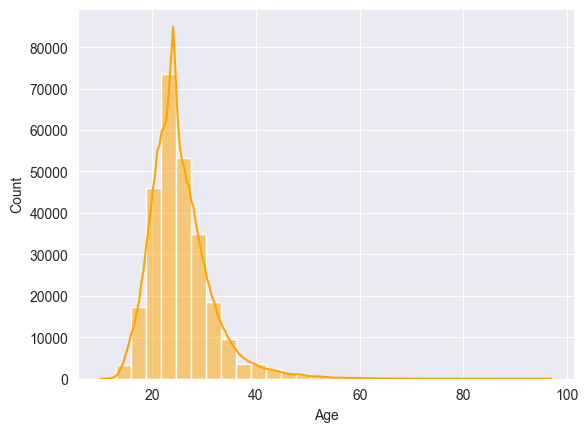

In [266]:
sns.histplot(df_clean['Age'], bins=30, kde=True, color='orange')
print(df_clean['Age'].skew())
plt.show()

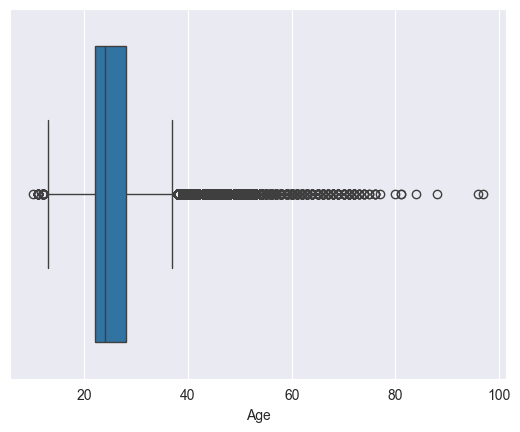

In [267]:
sns.boxplot(x = df_clean['Age'])
plt.show()

IQR Method

In [268]:
Q1 = df_clean['Age'].quantile(0.25)
Q2 = df_clean['Age'].quantile(0.75)
IQR = Q2 - Q1
lower = Q1 - 1.5 * IQR
upper = Q1 + 1.5 * IQR
outliers= df_clean[(df_clean['Age'] < lower) & (df_clean['Age'] > upper)]
print(len(outliers))
df_clean = df_clean[(df_clean['Age'] >= lower) & (df_clean['Age'] <= upper)]

0


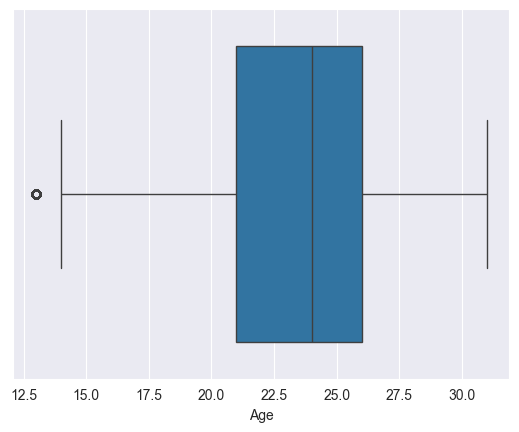

In [269]:
sns.boxplot(x = df_clean['Age'])
plt.show()

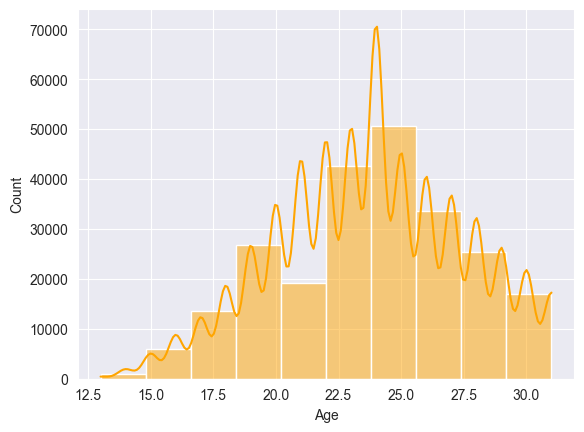

-0.09697667069701038


In [270]:
sns.histplot(df_clean['Age'], bins=10, kde=True, color='orange')
plt.show()
print(df_clean['Age'].skew())

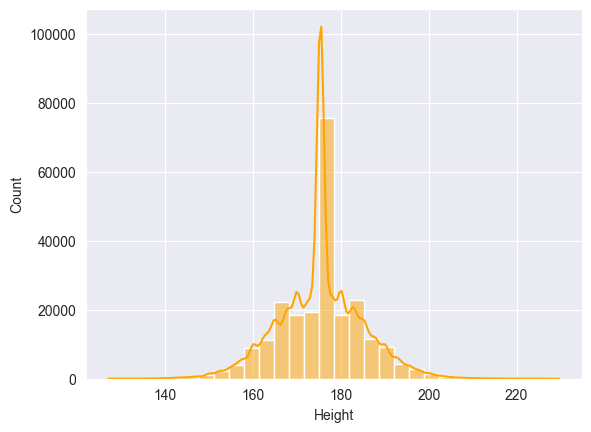

0.01058462673708156


In [271]:
sns.histplot(df_clean['Height'], bins=30, kde=True, color='orange')
plt.show()
print(df_clean['Height'].skew())

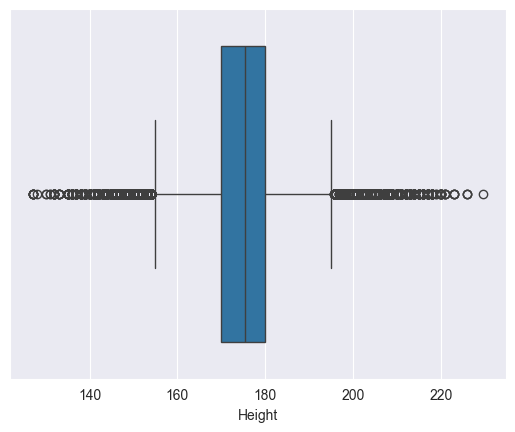

In [272]:
sns.boxplot(x = df_clean['Height'])
plt.show()

Z-SCORE METHOD

In [273]:
z_score = np.abs(stats.zscore(df_clean['Height']))
threshold = 3
outliers = df_clean[z_score > threshold]
print(outliers.shape)
df_clean = df_clean[z_score <= threshold]

(1744, 7)


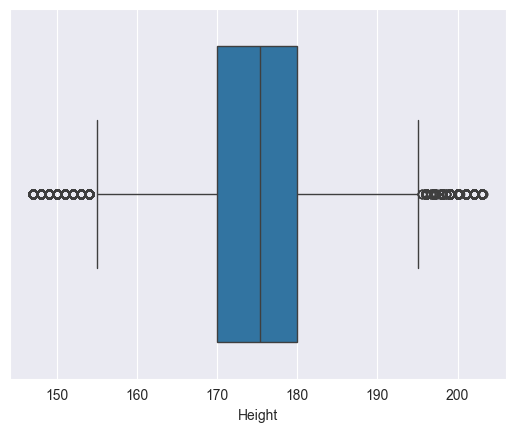

In [274]:
sns.boxplot(x=df_clean['Height'])
plt.show()

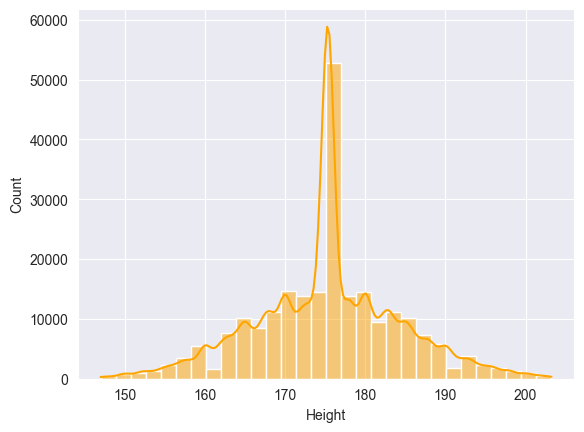

0.00395806711074177


In [275]:
sns.histplot(df_clean['Height'], bins=30, kde=True, color='orange')
plt.show()
print(df_clean['Height'].skew())

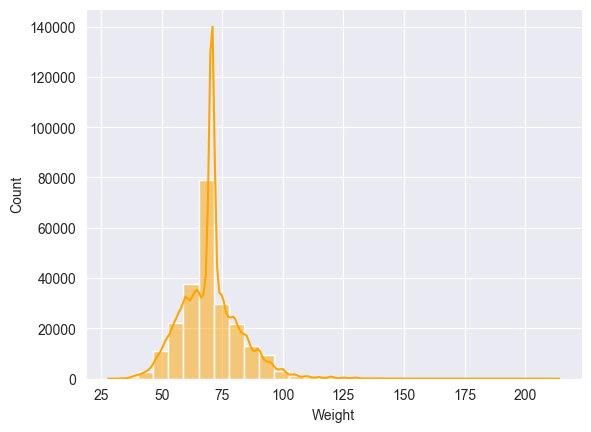

0.8870909183389527


In [276]:
sns.histplot(df_clean['Weight'], bins=30, kde=True, color='orange')
plt.show()
print(df_clean['Weight'].skew())

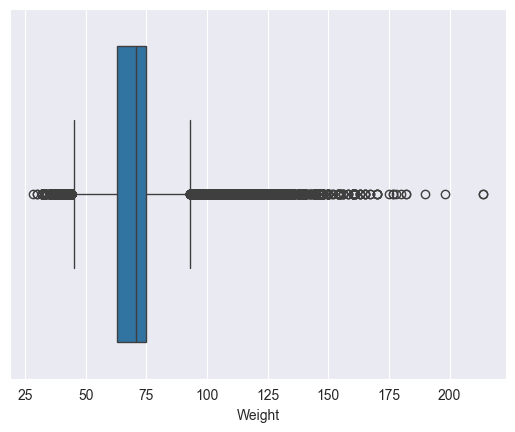

In [277]:
sns.boxplot(x=df_clean['Weight'])
plt.show()

In [278]:
Q1 = df_clean['Weight'].quantile(0.25)
Q2 = df_clean['Weight'].quantile(0.75)
IQR = Q2 - Q1
lower = Q1 - 1.5 * IQR
upper = Q1 + 1.5 * IQR
outliers= df_clean[(df_clean['Weight'] < lower) & (df_clean['Weight'] > upper)]
print(len(outliers))
df_clean = df_clean[(df_clean['Weight'] >= lower) & (df_clean['Weight'] <= upper)]

0


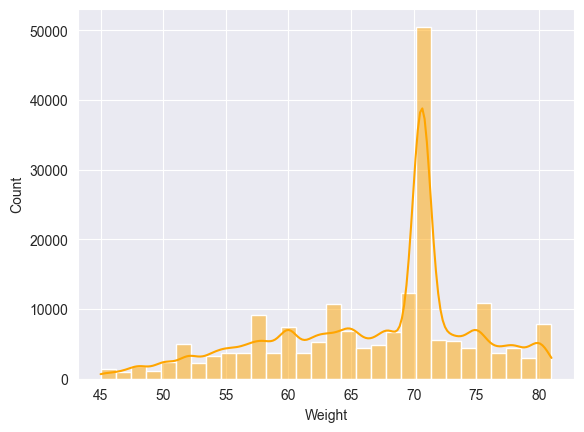

-0.5975235403988637


In [279]:
sns.histplot(df_clean['Weight'], bins=30, kde=True, color='orange')
plt.show()
print(df_clean['Weight'].skew())

In [280]:
X_train, X_test, y_train, y_test = train_test_split(
    df_clean.drop(columns=['Medal']),
    df_clean['Medal'],
    test_size=0.2,
    random_state=42,
    stratify=df_clean['Medal']
)

In [281]:
print("India" in X_train['region'].unique())

True


In [282]:
print(sorted(X_train['region'].unique()))

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Boliva', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 

In [283]:
print(X.shape)
print(y.shape)

(269361, 6)
(269361,)


In [284]:
print(X_train.shape)
print(y_train.shape)

(157001, 6)
(157001,)


In [285]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

In [286]:
y_train

0         0
1         2
2         2
3         0
4         2
         ..
156996    2
156997    2
156998    2
156999    2
157000    2
Name: Medal, Length: 157001, dtype: int64

In [287]:
X_train

,Sex,Age,Height,Weight,Sport,region
0,F,26.0,163.000000,65.000000,Ice Hockey,Finland
1,F,21.0,170.000000,65.000000,Swimming,Canada
2,M,20.0,181.000000,79.000000,Speed Skating,Netherlands
3,M,19.0,173.000000,60.000000,Boxing,Serbia
4,M,24.0,175.359153,70.687255,Art Competitions,Belgium
...,...,...,...,...,...,...
156996,M,20.0,173.000000,67.000000,Nordic Combined,Germany
156997,M,20.0,190.000000,70.000000,Athletics,South Korea
156998,M,21.0,175.359153,70.687255,Cycling,France
156999,F,25.0,168.000000,60.000000,Luge,Slovakia


MODEL PIPELINE AND TRAINING

In [288]:
# numeric_transformer = ColumnTransformer(transformers=[
#     ('age_imputer', SimpleImputer(strategy='median'), ['Age']),
#     ('hw_imputer', IterativeImputer(random_state=42), ['Height', 'Weight'])
# ])

In [289]:
# categorical_transformer = ColumnTransformer(transformers=[
#     ('sex', OrdinalEncoder(), ['Sex']),
#     ('sport', OneHotEncoder(handle_unknown='ignore'), ['Sport']),
#     ('region', TargetEncoder(), 'region')
# ])

In [290]:
# preprocessor = ColumnTransformer(transformers=[
#     ('num', numeric_transformer, ['Age', 'Height', 'Weight']),
#     ('cat', categorical_transformer, ['Sex', 'Sport', 'region'])
# ])

In [291]:
print(X_train.shape)
print(y_train.shape)

(157001, 6)
(157001,)


In [292]:
preprocessor = ColumnTransformer(transformers=[
    ('age_imputer', SimpleImputer(strategy='median'), ['Age']),
    ('hw_imputer', IterativeImputer(random_state=42), ['Height', 'Weight']),

    ('sex_encoder', OrdinalEncoder(), ['Sex']),
    ('sport_encoder', OneHotEncoder(handle_unknown='ignore'), ['Sport']),
    ('region_encoder', TargetEncoder(), ['region'])
])


In [293]:
print("X_train length:", len(X_train))
print("y_train length:", len(y_train))

print("X_train index head:", X_train.index[:10].tolist())
print("y_train index head:", y_train.index[:10].tolist())

print("X_train tail index:", X_train.index[-10:].tolist())
print("y_train tail index:", y_train.index[-10:].tolist())

X_train length: 157001
y_train length: 157001
X_train index head: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_train index head: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
X_train tail index: [156991, 156992, 156993, 156994, 156995, 156996, 156997, 156998, 156999, 157000]
y_train tail index: [156991, 156992, 156993, 156994, 156995, 156996, 156997, 156998, 156999, 157000]


In [294]:
print("y_train type:", type(y_train))
print("X_train type:", type(X_train))

y_train type: <class 'pandas.core.series.Series'>
X_train type: <class 'pandas.core.frame.DataFrame'>


In [295]:
print(X_train.shape)
print(y_train.shape)

(157001, 6)
(157001,)


In [296]:
X_train_preprocessed = preprocessor.fit_transform(X_train, y_train)
X_test_preprocessed  = preprocessor.transform(X_test)

In [297]:
print("before SMOTE", np.bincount(y_train))

before SMOTE [  7303   7015 135661   7022]


In [298]:
smote = SMOTE(sampling_strategy={
    0: 8000,
    1: 8000,
    3: 8000
}, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_preprocessed, y_train)

In [299]:
print("before SMOTE", np.bincount(y_train_res))

before SMOTE [  8000   8000 135661   8000]


In [300]:
test_df = pd.DataFrame([{
    "Age": 40,
    "Sex": "F",
    "Height": 150,
    "Weight": 45,
    "Sport": "Shooting",
    "region": "India"
}])

test_trans = preprocessor.transform(test_df)

print(test_trans)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5 stored elements and shape (1, 69)>
  Coords	Values
  (0, 0)	40.0
  (0, 1)	150.0
  (0, 2)	45.0
  (0, 49)	1.0
  (0, 68)	1.8447729672650475


In [301]:
feature_names = preprocessor.get_feature_names_out()

df_sample = pd.DataFrame(
    X_train_res[:5].toarray(),
    columns=feature_names
)
df_sample

,age_imputer__Age,hw_imputer__Height,hw_imputer__Weight,sex_encoder__Sex,sport_encoder__Sport_Alpine Skiing,sport_encoder__Sport_Alpinism,sport_encoder__Sport_Archery,sport_encoder__Sport_Art Competitions,sport_encoder__Sport_Athletics,sport_encoder__Sport_Badminton,...,sport_encoder__Sport_Taekwondo,sport_encoder__Sport_Tennis,sport_encoder__Sport_Trampolining,sport_encoder__Sport_Triathlon,sport_encoder__Sport_Tug-Of-War,sport_encoder__Sport_Volleyball,sport_encoder__Sport_Water Polo,sport_encoder__Sport_Weightlifting,sport_encoder__Sport_Wrestling,region_encoder__region
0,26.0,163.000000,65.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.865484
1,21.0,170.000000,65.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.898100
2,20.0,181.000000,79.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.851381
3,19.0,173.000000,60.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.958452
4,24.0,175.359153,70.687255,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.939743


In [302]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_res),
    y=y_train_res
)

print(weights)

[4.98940625 4.98940625 0.29422789 4.98940625]


In [303]:
model = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.03,
    num_leaves=64,
    random_state=42,
    class_weight={0:weights[0], 1:weights[1], 2:weights[2], 3:weights[3]},
    n_jobs=-1
)

model.fit(X_train_res, y_train_res)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2263
[LightGBM] [Info] Number of data points in the train set: 159661, number of used features: 62
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294


,boosting_type,'gbdt'
,num_leaves,64
,max_depth,-1
,learning_rate,0.03
,n_estimators,500
,subsample_for_bin,200000
,objective,None
,class_weight,"{0: np.float64(4.98940625), 1: np.float64(4.98940625), 2: np.float64(0.2942278915826951), 3: np.float64(4.98940625)}"
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [304]:
y_pred = model.predict(X_test_preprocessed)

C:\Users\Ayushi\Projects\Olympics Data Analysis Project\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [305]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.37      0.18      1826
           1       0.19      0.51      0.28      1754
           2       0.96      0.68      0.80     33916
           3       0.13      0.32      0.18      1755

    accuracy                           0.65     39251
   macro avg       0.35      0.47      0.36     39251
weighted avg       0.85      0.65      0.72     39251



In [306]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[  668   360   451   347]
 [  274   901   265   314]
 [ 4457  3050 23231  3178]
 [  378   444   367   566]]
